In [1]:
!pip install pytorch_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.4 MB/s eta 0:00:00:00:010:01
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=327ace93f0fe1704d8a843c831e1be975b391e4467712d9d94b78f92a0a7f613
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfull

In [2]:
from pytorch_tabular import available_models
available_models()

['AutoIntConfig',
 'CategoryEmbeddingModelConfig',
 'DANetConfig',
 'FTTransformerConfig',
 'GANDALFConfig',
 'GatedAdditiveTreeEnsembleConfig',
 'MDNConfig',
 'NodeConfig',
 'TabNetModelConfig',
 'TabTransformerConfig']

In [3]:
import numpy as np
import pandas as pd

In [4]:
# 🚫 Suppressing warnings 🚫
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/kaggle/input/colombian-frenchteam-problematicinternetusage/Dataset_problematic_internet_usage.csv')
len(df)

3960

In [6]:
sii_counts = df['sii'].value_counts(dropna=False)
sii_percentages = (sii_counts / sii_counts.sum()) * 100
sii_summary = pd.DataFrame({'Count': sii_counts,'Percentage': sii_percentages})

print(sii_summary)

     Count  Percentage
sii                   
0.0   1594   40.252525
NaN   1224   30.909091
1.0    730   18.434343
2.0    378    9.545455
3.0     34    0.858586


In [7]:
featuresCols = ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
                'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
                'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
                'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
                'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
                'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
                'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
                'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
                'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
                'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
                'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
                'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
                'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
                'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
                'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
                'PAQ_C-PAQ_C_Total', 'SDS-Season', 'SDS-SDS_Total_Raw',
                'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
                'PreInt_EduHx-computerinternet_hoursday', 'sii']

In [8]:
df = df[featuresCols]
df = df.dropna(subset='sii')
len(df)

2736

In [9]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
len(numerical_columns)

49

In [10]:
sii_counts = df['sii'].value_counts(dropna=False)
sii_percentages = (sii_counts / sii_counts.sum()) * 100
sii_summary = pd.DataFrame({'Count': sii_counts,'Percentage': sii_percentages})

print(sii_summary)

     Count  Percentage
sii                   
0.0   1594   58.260234
1.0    730   26.681287
2.0    378   13.815789
3.0     34    1.242690


In [11]:
def update(df):
    for c in cat_c: 
        df[c] = df[c].fillna('Missing')
        df[c] = df[c].astype('category')
    return df

In [12]:
cat_c = ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 
          'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season']

df = update(df)

In [13]:
def create_mapping(column, dataset):
    unique_values = dataset[column].unique()
    return {value: idx for idx, value in enumerate(unique_values)}

In [14]:
for col in cat_c:
    mapping_df = create_mapping(col, df)
    df[col] = df[col].replace(mapping_df).astype(int)

print(f'df Shape : {df.shape}')

df Shape : (2736, 59)


In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [16]:
len(numeric_columns)

59

In [17]:
df.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0.0,5.0,0.0,0.0,51.000000,0.0,16.877316,46.0,50.8,26.625259,...,0.0,2.185758,0.0,2.590608,0.0,40.977839,57.647525,0.0,3.0,2.0
1,1.0,9.0,0.0,1.0,65.159266,0.0,14.035590,48.0,46.0,22.000000,...,0.0,2.185758,1.0,2.340000,1.0,46.000000,64.000000,1.0,0.0,0.0
2,1.0,10.0,1.0,2.0,71.000000,0.0,16.648696,56.5,75.6,26.625259,...,0.0,2.185758,2.0,2.170000,1.0,38.000000,54.000000,1.0,2.0,0.0
3,2.0,9.0,0.0,2.0,71.000000,1.0,18.292347,56.0,81.6,26.625259,...,0.0,2.185758,3.0,2.451000,2.0,31.000000,45.000000,2.0,0.0,1.0
5,3.0,13.0,1.0,0.0,50.000000,1.0,22.279952,59.5,112.2,26.625259,...,0.0,2.185758,4.0,4.110000,2.0,40.000000,56.000000,3.0,0.0,1.0


In [18]:
df.isnull().values.any()

False

In [19]:
from sklearn.metrics import cohen_kappa_score, make_scorer, confusion_matrix

# Helper functions for Kappa scoring and threshold adjustment
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

def threshold_Rounder(oof_non_rounded, thresholds):
    return np.where(oof_non_rounded < thresholds[0], 0,
                    np.where(oof_non_rounded < thresholds[1], 1,
                             np.where(oof_non_rounded < thresholds[2], 2, 3)))

def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(y_true, rounded_p)

def eval_preds(thresholds, y_true, y_pred):
    y_pred = threshold_Rounder(y_pred, thresholds)
    score = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    return -score

# Custom Kappa scorer
KAPPA_SCORER = make_scorer(
    cohen_kappa_score, 
    greater_is_better=True, 
    weights='quadratic'
)

In [20]:
#for col in cat_c:
#    df[col] = df[col].astype('category')

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.2)
train, val = train_test_split(train, random_state=42, test_size=0.2)
print(f"Train Shape: {train.shape} | Val Shape: {val.shape} | Test Shape: {test.shape}")

Train Shape: (1750, 59) | Val Shape: (438, 59) | Test Shape: (548, 59)


In [22]:
numerical_columns = ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday']

In [23]:
target_col = ['sii']

In [24]:
categorical_columns = ['Basic_Demos-Enroll_Season',
 'CGAS-Season',
 'Physical-Season',
 'Fitness_Endurance-Season',
 'FGC-Season',
 'BIA-Season',
 'PAQ_A-Season',
 'PAQ_C-Season',
 'SDS-Season',
 'PreInt_EduHx-Season']

In [28]:
1+1

2

# GANDALF Model

In [51]:
from pytorch_tabular.models import GANDALFConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular import TabularModel

In [52]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=64,
    max_epochs=100,
)

optimizer_config = OptimizerConfig()
model_config = GANDALFConfig(
    task="regression",
    gflu_stages=5, #6,
    gflu_feature_init_sparsity= 0.12205823231929194, #0.3,
    gflu_dropout=0.16983769351252187, #0.0,
    learning_rate=0.00016181005577836825, #1e-3,
)

In [53]:
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

In [54]:
len(df)

2736

In [55]:
tabular_model.fit(train=train)

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  184 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Sequential       │     80 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 184 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 184 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

In [56]:
pred_df = tabular_model.predict(test)
pred_df

,sii_prediction
1044,0.418148
2240,1.154533
594,0.375153
2599,0.681980
736,0.740351
...,...
3898,0.555839
967,0.690604
2322,0.367762
2687,0.751445


In [57]:
pred_df = tabular_model.predict(test)
pred_df['sii']=test['sii']
pred_df.head()

,sii_prediction,sii
1044,0.418148,0.0
2240,1.154533,0.0
594,0.375153,1.0
2599,0.681980,0.0
736,0.740351,0.0


In [58]:
thresholds = [0.54167994, 0.83456239, 2.90832825]
pred_df['sii_prediction_rounded'] = threshold_Rounder(pred_df['sii_prediction'], thresholds)
pred_df.head()

,sii_prediction,sii,sii_prediction_rounded
1044,0.418148,0.0,0
2240,1.154533,0.0,2
594,0.375153,1.0,0
2599,0.681980,0.0,1
736,0.740351,0.0,1


In [59]:
cohen_kappa_score(pred_df['sii'], pred_df['sii_prediction_rounded'],weights='quadratic')

0.45034257144620693

In [82]:
from sklearn.model_selection import StratifiedKFold

thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(threshold_Rounder(predictions['sii_prediction'], thresholds))
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, threshold_Rounder(predictions['sii_prediction'], thresholds),weights='quadratic')
    print(f"Fold {fold + 1} Accuracy: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

Epoch 9/99 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28/28 0:00:00 • 0:00:00 29.70it/s v_num: 13.000 train_loss: 0.448    
                                                                                valid_loss: 0.497                  
                                                                                valid_mean_squared_error: 0.497    
                                                                                train_mean_squared_error: 0.437    

Fold 5 Accuracy: 0.4233

Overall Cohen Kappa (from all folds): 0.4376


In [83]:
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")


Overall Cohen Kappa (from all folds): 0.4376


In [60]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=64,
    max_epochs=100,
)

optimizer_config = OptimizerConfig()

In [61]:
from pytorch_tabular.tabular_model_tuner import TabularModelTuner

In [62]:
search_space_gandalf = {
    "optimizer_config__optimizer": ["Adam", "SGD"],
    "model_config__gflu_stages": [4,8],
    "model_config__gflu_feature_init_sparsity": [0.1, 0.5],
    "model_config__learning_rate": [1e-4, 1e-2],
    "model_config__gflu_dropout": [0.0, 0.2],
    "trainer_config__batch_size": [32, 64],
}

In [63]:
model_config_gandalf = GANDALFConfig(task="regression")

search_spaces = search_space_gandalf
model_configs = model_config_gandalf

In [64]:
import time

# Start time
start_time = time.time()

tuner = TabularModelTuner(
    data_config=data_config,
    model_config=model_configs,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tuner_df = tuner.tune(
        train=train,
        validation=val,
        search_space=search_spaces,
        strategy="grid_search",  # random_search
        # n_trials=5,
        metric="mean_squared_error",
        mode="min",
        progress_bar=True,
        verbose=True # Make True if you want to log metrics and params each trial
    )

# End time
end_time = time.time()

# Calculate the time taken
elapsed_time = end_time - start_time

# Display the elapsed time
print(f"Time taken: {elapsed_time:.4f} seconds")

Output()

ValueError: The trainer_config is not supported by tuner. Please remove it from tuner parameters!

In [30]:
tuner_df.trials_df.sort_values("mean_squared_error", ascending=True).style.background_gradient(
    subset=["mean_squared_error"], cmap="RdYlGn"
).background_gradient(subset=["loss"], cmap="RdYlGn_r")

,trial_id,model_config__gflu_dropout,model_config__gflu_feature_init_sparsity,model_config__gflu_stages,model_config__learning_rate,optimizer_config__optimizer,trainer_config__batch_size,loss,mean_squared_error
36,36,0.200000,0.100000,4,0.010000,Adam,32,0.440718,0.440718
55,55,0.200000,0.500000,4,0.010000,SGD,64,0.441960,0.441960
52,52,0.200000,0.500000,4,0.010000,Adam,32,0.442147,0.442147
11,11,0.000000,0.100000,8,0.000100,SGD,64,0.443216,0.443216
57,57,0.200000,0.500000,8,0.000100,Adam,64,0.443953,0.443953
33,33,0.200000,0.100000,4,0.000100,Adam,64,0.444060,0.444060
29,29,0.000000,0.500000,8,0.010000,Adam,64,0.444323,0.444323
47,47,0.200000,0.100000,8,0.010000,SGD,64,0.444800,0.444800
12,12,0.000000,0.100000,8,0.010000,Adam,32,0.444989,0.444989
49,49,0.200000,0.500000,4,0.000100,Adam,64,0.445073,0.445073


In [134]:
tuner_df.trials_df.sort_values("mean_squared_error", ascending=True).style.background_gradient(
    subset=["mean_squared_error"], cmap="RdYlGn"
).background_gradient(subset=["loss"], cmap="RdYlGn_r")

,trial_id,model_config__gflu_dropout,model_config__gflu_feature_init_sparsity,model_config__gflu_stages,model_config__learning_rate,optimizer_config__optimizer,trainer_config__batch_size,loss,mean_squared_error
56,56,0.200000,0.500000,8,0.000100,Adam,32,0.437583,0.437583
0,0,0.000000,0.100000,4,0.000100,Adam,32,0.438404,0.438404
26,26,0.000000,0.500000,8,0.000100,SGD,32,0.438966,0.438966
38,38,0.200000,0.100000,4,0.010000,SGD,32,0.440052,0.440052
8,8,0.000000,0.100000,8,0.000100,Adam,32,0.440405,0.440405
53,53,0.200000,0.500000,4,0.010000,Adam,64,0.440424,0.440424
3,3,0.000000,0.100000,4,0.000100,SGD,64,0.440507,0.440507
55,55,0.200000,0.500000,4,0.010000,SGD,64,0.441656,0.441656
46,46,0.200000,0.100000,8,0.010000,SGD,32,0.442151,0.442151
4,4,0.000000,0.100000,4,0.010000,Adam,32,0.443033,0.443033


In [33]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=32,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(optimizer="Adam")
model_config = GANDALFConfig(
    task="regression",
    gflu_stages=8, #6,
    gflu_feature_init_sparsity= 0.500000, #0.3,
    gflu_dropout=0.200000, #0.0,
    learning_rate=0.000100, #1e-3,
    #target_range = [(-0.1, 3.1)]
)

In [34]:
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

Training fold 1/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  184 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Sequential       │     80 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 184 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 184 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

Fold 1 Quadratic Cohen Kappa: 0.4165
Training fold 2/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  184 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Sequential       │     80 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 184 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 184 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

Fold 2 Quadratic Cohen Kappa: 0.4946
Training fold 3/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  184 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Sequential       │     80 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 184 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 184 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

Fold 3 Quadratic Cohen Kappa: 0.4126
Training fold 4/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  184 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Sequential       │     80 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 184 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 184 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

Fold 4 Quadratic Cohen Kappa: 0.4465
Training fold 5/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  184 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Sequential       │     80 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 184 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 184 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

Fold 5 Quadratic Cohen Kappa: 0.4233

Overall Quadratic Cohen Kappa (from all folds): 0.4376


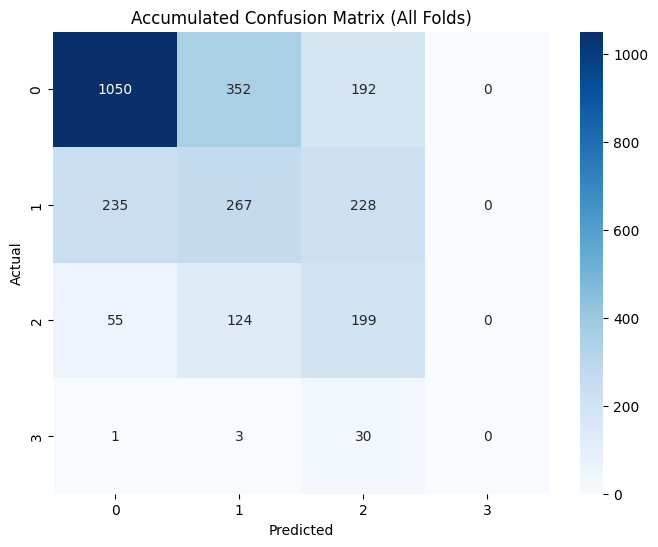

Time taken: 54.8206 seconds


In [69]:
import time

# Start time
start_time = time.time()


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Initialize a confusion matrix (to accumulate results across all folds)
total_confusion_matrix = np.zeros((4, 4), dtype=int)  # Assuming 'sii' has 4 possible values (0, 1, 2, 3)

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)
    
    # Store the predictions and true labels for later evaluation
    predicted_labels = threshold_Rounder(predictions['sii_prediction'], thresholds)
    all_predictions.extend(predicted_labels)
    all_true_labels.extend(y_test)
    
    # Calculate the confusion matrix for this fold and accumulate
    fold_confusion_matrix = confusion_matrix(y_test, predicted_labels, labels=[0, 1, 2, 3])
    total_confusion_matrix += fold_confusion_matrix
    
    # Calculate and print Cohen Kappa score for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, predicted_labels, weights='quadratic')
    print(f"Fold {fold + 1} Quadratic Cohen Kappa: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Quadratic Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

# Plot the confusion matrix (accumulated across all folds)
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Accumulated Confusion Matrix (All Folds)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# End time
end_time = time.time()

# Calculate the time taken
elapsed_time = end_time - start_time

# Display the elapsed time
print(f"Time taken: {elapsed_time:.4f} seconds")

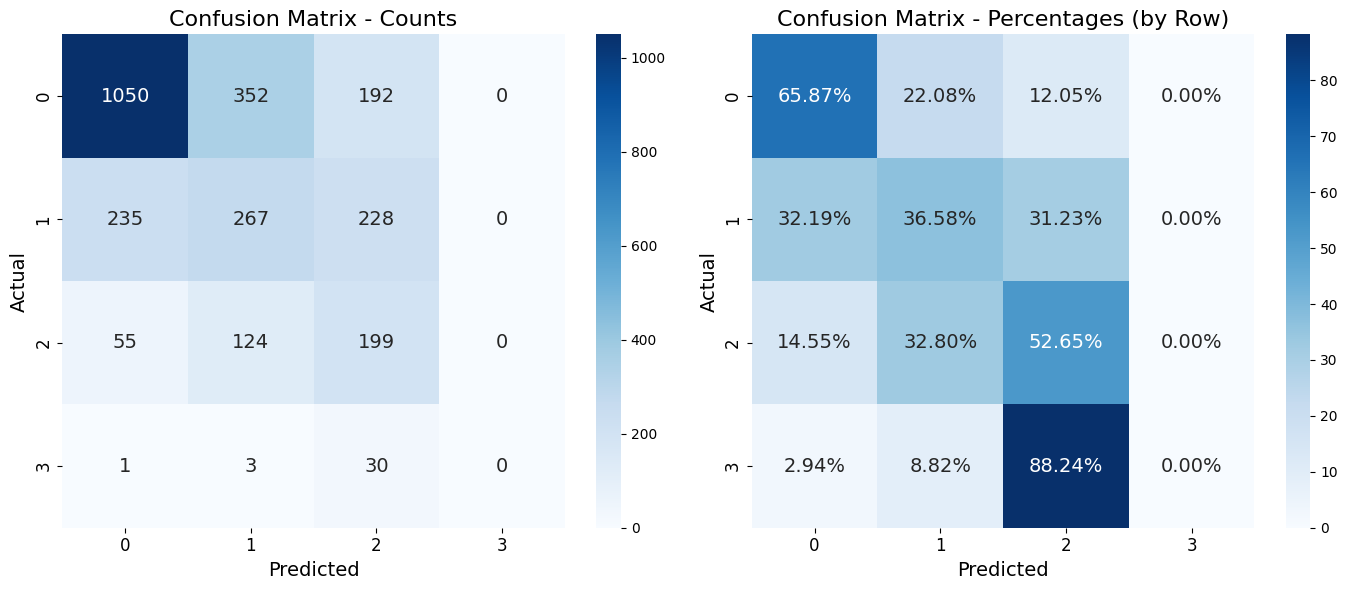

In [70]:
total_confusion_matrix = total_confusion_matrix

# Calculate the percentage confusion matrix by row
row_sums = np.sum(total_confusion_matrix, axis=1, keepdims=True)  # Sum of each row
percentage_confusion_matrix_by_row = total_confusion_matrix / row_sums * 100  # Normalize by row

# Manually format the percentages by adding '%' to each label
formatted_percentage_matrix = np.array([['{:.2f}%'.format(val) for val in row] for row in percentage_confusion_matrix_by_row])

# Create a figure with two subplots: one for the counts and one for percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix with counts
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[0], annot_kws={"size": 14})
axes[0].set_title("Confusion Matrix - Counts", fontsize=16)
axes[0].set_xlabel("Predicted", fontsize=14)
axes[0].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the confusion matrix with formatted percentages by row
sns.heatmap(percentage_confusion_matrix_by_row, annot=formatted_percentage_matrix, fmt="s", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[1], annot_kws={"size": 14})
axes[1].set_title("Confusion Matrix - Percentages (by Row)", fontsize=16)
axes[1].set_xlabel("Predicted", fontsize=14)
axes[1].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [138]:
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")


Overall Cohen Kappa (from all folds): 0.4310


# Category Embedding Model

In [84]:
from pytorch_tabular.models import CategoryEmbeddingModelConfig

In [85]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=64,
    max_epochs=100,
)

optimizer_config = OptimizerConfig()
model_config = CategoryEmbeddingModelConfig(
    task="regression",
)

In [86]:
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

In [90]:
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize

initial_thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)

    result = minimize(
        eval_preds, 
        x0=initial_thresholds, 
        args=(y_test, predictions['sii_prediction']), 
        method='Nelder-Mead',
        options={'xatol': 1e-8, 'disp': False}
    )
    
    # Extract the optimized thresholds from the result
    optimized_thresholds = result.x

    print(f"Fold {fold + 1} Optimized threholds: {optimized_thresholds}")

    optimized_predictions = threshold_Rounder(predictions['sii_prediction'], optimized_thresholds)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(optimized_predictions)
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, optimized_predictions,weights='quadratic')
    print(f"Fold {fold + 1} Accuracy: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

Epoch 9/99 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28/28 0:00:00 • 0:00:00 48.90it/s v_num: 24.000 train_loss: 0.305    
                                                                                valid_loss: 0.646                  
                                                                                valid_mean_squared_error: 0.646    
                                                                                train_mean_squared_error: 0.290    

Fold 5 Optimized threholds: [0.5655943  0.93966285 2.70464332]
Fold 5 Accuracy: 0.2330

Overall Cohen Kappa (from all folds): 0.3013


In [91]:
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")


Overall Cohen Kappa (from all folds): 0.3013


In [104]:
search_space_category_embedding = {
    "optimizer_config__optimizer": ["Adam", "SGD"],
    "model_config__layers": ["128-64-32", "1024-512-256", "32-64-128", "256-512-1024"],
    "model_config__activation": ["ReLU", "LeakyReLU"],
    "model_config__embedding_dropout": [0.0, 0.2],
}

search_space_ft_transformer = {
    "optimizer_config__optimizer": ["Adam", "SGD"],
    "model_config__input_embed_dim": [32, 64],
    "model_config__num_attn_blocks": [3, 6, 8],
    "model_config__ff_hidden_multiplier": [4, 8],
    "model_config__transformer_activation": ["GEGLU", "LeakyReLU"],
    "model_config__embedding_dropout": [0.0, 0.2],
}

In [109]:
from pytorch_tabular.tabular_model_tuner import TabularModelTuner

In [99]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=64,
    max_epochs=100,
)

optimizer_config = OptimizerConfig()
model_config = CategoryEmbeddingModelConfig(
    task="regression",
)

model_config_category_embedding = CategoryEmbeddingModelConfig(task="regression")

search_spaces = search_space_category_embedding
model_configs = model_config_category_embedding

In [121]:
tuner = TabularModelTuner(
    data_config=data_config,
    model_config=model_configs,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tuner_df = tuner.tune(
        train=train,
        validation=val,
        search_space=search_spaces,
        strategy="grid_search",  # random_search
        # n_trials=5,
        metric="mean_squared_error",
        mode="min",
        progress_bar=True,
        verbose=True # Make True if you want to log metrics and params each trial
    )

Grid Search... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:01:29

In [123]:
tuner_df.trials_df.sort_values("mean_squared_error", ascending=True).style.background_gradient(
    subset=["mean_squared_error"], cmap="RdYlGn"
).background_gradient(subset=["loss"], cmap="RdYlGn_r")

,trial_id,model_config__activation,model_config__embedding_dropout,model_config__layers,optimizer_config__optimizer,loss,mean_squared_error
19,19,LeakyReLU,0.000000,1024-512-256,SGD,0.466359,0.466359
25,25,LeakyReLU,0.200000,128-64-32,SGD,0.473431,0.473431
16,16,LeakyReLU,0.000000,128-64-32,Adam,0.479715,0.479715
7,7,ReLU,0.000000,256-512-1024,SGD,0.482018,0.482018
30,30,LeakyReLU,0.200000,256-512-1024,Adam,0.482572,0.482572
3,3,ReLU,0.000000,1024-512-256,SGD,0.482821,0.482821
1,1,ReLU,0.000000,128-64-32,SGD,0.493226,0.493226
14,14,ReLU,0.200000,256-512-1024,Adam,0.494745,0.494745
15,15,ReLU,0.200000,256-512-1024,SGD,0.504576,0.504576
9,9,ReLU,0.200000,128-64-32,SGD,0.507642,0.507642


In [125]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=64,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(optimizer="SGD")
model_config = CategoryEmbeddingModelConfig(
    task="regression",
    batch_norm_continuous_input='True',
    learning_rate='1e-4'
    layers="1024-512-256",
    activation="LeakyReLU",
)

In [126]:
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

In [127]:
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize

initial_thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)

    result = minimize(
        eval_preds, 
        x0=initial_thresholds, 
        args=(y_test, predictions['sii_prediction']), 
        method='Nelder-Mead',
        options={'xatol': 1e-8, 'disp': False}
    )
    
    # Extract the optimized thresholds from the result
    optimized_thresholds = result.x

    print(f"Fold {fold + 1} Optimized threholds: {optimized_thresholds}")

    optimized_predictions = threshold_Rounder(predictions['sii_prediction'], optimized_thresholds)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(optimized_predictions)
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, optimized_predictions,weights='quadratic')
    print(f"Fold {fold + 1} Accuracy: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

Epoch 13/99 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28/28 0:00:00 • 0:00:00 35.77it/s v_num: 61.000 train_loss: 0.389   
                                                                                 valid_loss: 0.633                 
                                                                                 valid_mean_squared_error: 0.633   
                                                                                 train_mean_squared_error: 0.440   

Fold 5 Optimized threholds: [0.59780947 0.91834563 2.60446995]
Fold 5 Accuracy: 0.3153

Overall Cohen Kappa (from all folds): 0.3204


In [128]:
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")


Overall Cohen Kappa (from all folds): 0.3204


# Tabnet 

In [65]:
from pytorch_tabular.models import TabNetModelConfig

In [66]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    max_epochs=100,
)

optimizer_config = OptimizerConfig()

In [67]:
search_space_tabnet = {
    "optimizer_config__optimizer": ["Adam", "SGD"],
    "model_config__n_d": [4,8,12],
    "model_config__n_a": [4,8,12],
    "model_config__learning_rate": [1e-4, 1e-2],
    "trainer_config__batch_size": [32, 64],
}

model_config_tabnet = TabNetModelConfig(task="regression")

search_spaces = search_space_tabnet
model_configs = model_config_tabnet

In [143]:
tuner = TabularModelTuner(
    data_config=data_config,
    model_config=model_configs,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tuner_df = tuner.tune(
        train=train,
        validation=val,
        search_space=search_spaces,
        strategy="grid_search",  # random_search
        # n_trials=5,
        metric="mean_squared_error",
        mode="min",
        progress_bar=True,
        verbose=True # Make True if you want to log metrics and params each trial
    )

Grid Search... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:15:59

In [144]:
tuner_df.trials_df.sort_values("mean_squared_error", ascending=True).style.background_gradient(
    subset=["mean_squared_error"], cmap="RdYlGn"
).background_gradient(subset=["loss"], cmap="RdYlGn_r")

,trial_id,model_config__learning_rate,model_config__n_a,model_config__n_d,optimizer_config__optimizer,trainer_config__batch_size,loss,mean_squared_error
44,44,0.010000,4,12,Adam,32,0.536580,0.536580
57,57,0.010000,8,12,Adam,64,0.539983,0.539983
2,2,0.000100,4,4,SGD,32,0.552085,0.552085
9,9,0.000100,4,12,Adam,64,0.565907,0.565907
38,38,0.010000,4,4,SGD,32,0.567437,0.567437
17,17,0.000100,8,8,Adam,64,0.568738,0.568738
47,47,0.010000,4,12,SGD,64,0.569487,0.569487
11,11,0.000100,4,12,SGD,64,0.571039,0.571039
42,42,0.010000,4,8,SGD,32,0.574645,0.574645
45,45,0.010000,4,12,Adam,64,0.575731,0.575731


In [33]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=32,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau")
model_config = TabNetModelConfig(
    task="regression",
    n_d=67,
    n_a=99,
    n_steps=8,
    gamma=1.3,
    n_independent= 2, 
    n_shared= 4,
    learning_rate= 0.06442604646600388,
    mask_type="entmax"
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

In [34]:
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize

initial_thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)

    result = minimize(
        eval_preds, 
        x0=initial_thresholds, 
        args=(y_test, predictions['sii_prediction']), 
        method='Nelder-Mead',
        options={'xatol': 1e-8, 'disp': False}
    )
    
    # Extract the optimized thresholds from the result
    optimized_thresholds = result.x

    print(f"Fold {fold + 1} Optimized threholds: {optimized_thresholds}")

    optimized_predictions = threshold_Rounder(predictions['sii_prediction'], optimized_thresholds)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(optimized_predictions)
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, optimized_predictions,weights='quadratic')
    print(f"Fold {fold + 1} Cohen Kappa: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

Training fold 1/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  152 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 152 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 152 K                                                                                                
Total estimated model params size (MB): 0

Output()

Fold 1 Optimized threholds: [0.63195993 0.69546866 2.95680039]
Fold 1 Cohen Kappa: 0.1162
Training fold 2/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  152 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 152 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 152 K                                                                                                
Total estimated model params size (MB): 0

Output()

Fold 2 Optimized threholds: [0.5657546  0.87165405 2.78714791]
Fold 2 Cohen Kappa: 0.0501
Training fold 3/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  152 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 152 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 152 K                                                                                                
Total estimated model params size (MB): 0

Output()

Fold 3 Optimized threholds: [0.6154086  0.74646969 2.78714791]
Fold 3 Cohen Kappa: 0.0478
Training fold 4/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  152 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 152 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 152 K                                                                                                
Total estimated model params size (MB): 0

Output()

Fold 4 Optimized threholds: [0.54167994 0.83456239 2.90832825]
Fold 4 Cohen Kappa: 0.0131
Training fold 5/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │
│ 1 │ _backbone        │ TabNetBackbone │  152 K │
│ 2 │ _head            │ Identity       │      0 │
│ 3 │ loss             │ MSELoss        │      0 │
└───┴──────────────────┴────────────────┴────────┘

Trainable params: 152 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 152 K                                                                                                
Total estimated model params size (MB): 0

Output()

Fold 5 Optimized threholds: [0.62969364 0.74526765 3.28333903]
Fold 5 Cohen Kappa: 0.0309

Overall Cohen Kappa (from all folds): 0.0533


In [59]:
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")


Overall Cohen Kappa (from all folds): 0.2881


In [ ]:
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

# Tab transformer

In [26]:
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular.tabular_model_tuner import TabularModelTuner
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular import TabularModel

In [30]:

data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=32,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau")
model_config = TabTransformerConfig(
    task="regression",
    input_embed_dim=64,
    embedding_dropout=0,
    num_heads=8,
    num_attn_blocks=6,
    learning_rate= 1e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize

initial_thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)

    result = minimize(
        eval_preds, 
        x0=initial_thresholds, 
        args=(y_test, predictions['sii_prediction']), 
        method='Nelder-Mead',
        options={'xatol': 1e-8, 'disp': False}
    )
    
    # Extract the optimized thresholds from the result
    optimized_thresholds = result.x

    print(f"Fold {fold + 1} Optimized threholds: {optimized_thresholds}")

    optimized_predictions = threshold_Rounder(predictions['sii_prediction'], optimized_thresholds)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(optimized_predictions)
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, optimized_predictions,weights='quadratic')
    print(f"Fold {fold + 1} Cohen Kappa: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")


Training fold 1/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.1 M │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  3.9 K │
│ 2 │ _head            │ LinearHead             │    689 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.1 M                                                                                                
Total estimated model params size (MB): 4

Output()

Fold 1 Optimized threholds: [0.5327216  0.94165168 2.56580677]
Fold 1 Cohen Kappa: 0.4593
Training fold 2/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.1 M │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  3.9 K │
│ 2 │ _head            │ LinearHead             │    689 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.1 M                                                                                                
Total estimated model params size (MB): 4

Output()

Fold 2 Optimized threholds: [0.59933078 0.96625784 2.37296432]
Fold 2 Cohen Kappa: 0.4628
Training fold 3/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.1 M │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  3.9 K │
│ 2 │ _head            │ LinearHead             │    689 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.1 M                                                                                                
Total estimated model params size (MB): 4

Output()

Fold 3 Optimized threholds: [0.55205471 0.81271094 2.93785037]
Fold 3 Cohen Kappa: 0.3946
Training fold 4/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.1 M │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  3.9 K │
│ 2 │ _head            │ LinearHead             │    689 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.1 M                                                                                                
Total estimated model params size (MB): 4

Output()

Fold 4 Optimized threholds: [0.57022277 0.90651954 2.72081555]
Fold 4 Cohen Kappa: 0.4265
Training fold 5/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.1 M │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  3.9 K │
│ 2 │ _head            │ LinearHead             │    689 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 1.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.1 M                                                                                                
Total estimated model params size (MB): 4

Output()

Fold 5 Optimized threholds: [0.48263145 0.89554051 3.11903701]
Fold 5 Cohen Kappa: 0.4227

Overall Cohen Kappa (from all folds): 0.4318

Overall Cohen Kappa (from all folds): 0.4318


# Gated Additive Tree Ensemble

In [35]:
from pytorch_tabular.models import GatedAdditiveTreeEnsembleConfig
from pytorch_tabular.tabular_model_tuner import TabularModelTuner
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular import TabularModel

In [36]:

data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=32,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau")
model_config = GatedAdditiveTreeEnsembleConfig(
    task="regression",
    gflu_stages=6,
    gflu_dropout=0.1,
    tree_depth = 6,
    #num_trees = 10,
    feature_mask_function = 't-softmax',
    tree_dropout = 0,
    learning_rate = 1e-3,
    
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize

initial_thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)

    result = minimize(
        eval_preds, 
        x0=initial_thresholds, 
        args=(y_test, predictions['sii_prediction']), 
        method='Nelder-Mead',
        options={'xatol': 1e-8, 'disp': False}
    )
    
    # Extract the optimized thresholds from the result
    optimized_thresholds = result.x

    print(f"Fold {fold + 1} Optimized threholds: {optimized_thresholds}")

    optimized_predictions = threshold_Rounder(predictions['sii_prediction'], optimized_thresholds)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(optimized_predictions)
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, optimized_predictions,weights='quadratic')
    print(f"Fold {fold + 1} Cohen Kappa: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

Training fold 1/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ GatedAdditiveTreesBackbone │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer           │    273 │
│ 2 │ _head            │ CustomHead                 │     76 │
│ 3 │ loss             │ MSELoss                    │      0 │
└───┴──────────────────┴────────────────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 5

Output()

Fold 1 Optimized threholds: [0.55476822 0.93863971 2.85294821]
Fold 1 Cohen Kappa: 0.4734
Training fold 2/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ GatedAdditiveTreesBackbone │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer           │    273 │
│ 2 │ _head            │ CustomHead                 │     76 │
│ 3 │ loss             │ MSELoss                    │      0 │
└───┴──────────────────┴────────────────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 5

Output()

Fold 2 Optimized threholds: [0.52478334 0.73902263 3.2631817 ]
Fold 2 Cohen Kappa: 0.5199
Training fold 3/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ GatedAdditiveTreesBackbone │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer           │    273 │
│ 2 │ _head            │ CustomHead                 │     76 │
│ 3 │ loss             │ MSELoss                    │      0 │
└───┴──────────────────┴────────────────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 5

Output()

Fold 3 Optimized threholds: [0.58590506 0.85221384 2.78363218]
Fold 3 Cohen Kappa: 0.3956
Training fold 4/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ GatedAdditiveTreesBackbone │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer           │    273 │
│ 2 │ _head            │ CustomHead                 │     76 │
│ 3 │ loss             │ MSELoss                    │      0 │
└───┴──────────────────┴────────────────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 5

Output()

Fold 4 Optimized threholds: [0.57963155 0.87049047 2.72584399]
Fold 4 Cohen Kappa: 0.4445
Training fold 5/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ GatedAdditiveTreesBackbone │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer           │    273 │
│ 2 │ _head            │ CustomHead                 │     76 │
│ 3 │ loss             │ MSELoss                    │      0 │
└───┴──────────────────┴────────────────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 5

Output()

Fold 5 Optimized threholds: [0.5161842  0.88071232 2.91117075]
Fold 5 Cohen Kappa: 0.4019

Overall Cohen Kappa (from all folds): 0.4452

Overall Cohen Kappa (from all folds): 0.4452


# FTTransformer

In [37]:
from pytorch_tabular.models import FTTransformerConfig
from pytorch_tabular.tabular_model_tuner import TabularModelTuner
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular import TabularModel

In [38]:

data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=32,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau")
model_config = FTTransformerConfig(
    task="regression",
    input_embed_dim=128,
    embedding_initialization='kaiming_uniform',
    attn_dropout = 0.1,
    add_norm_dropout = 0.1,
    ff_dropout = 0.1,
    ff_hidden_multiplier = 4,
    learning_rate = 1e-3,
    batch_norm_continuous_input = "True"
    
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize

initial_thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)

    result = minimize(
        eval_preds, 
        x0=initial_thresholds, 
        args=(y_test, predictions['sii_prediction']), 
        method='Nelder-Mead',
        options={'xatol': 1e-8, 'disp': False}
    )
    
    # Extract the optimized thresholds from the result
    optimized_thresholds = result.x

    print(f"Fold {fold + 1} Optimized threholds: {optimized_thresholds}")

    optimized_predictions = threshold_Rounder(predictions['sii_prediction'], optimized_thresholds)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(optimized_predictions)
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, optimized_predictions,weights='quadratic')
    print(f"Fold {fold + 1} Cohen Kappa: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

Training fold 1/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  4.3 M │
│ 1 │ _embedding_layer │ Embedding2dLayer      │ 21.5 K │
│ 2 │ _head            │ LinearHead            │    129 │
│ 3 │ loss             │ MSELoss               │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 4.4 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.4 M                                                                                                
Total estimated model params size (MB): 17

Output()

Fold 1 Optimized threholds: [0.68305368 0.98110308 2.2280744 ]
Fold 1 Cohen Kappa: 0.5059
Training fold 2/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  4.3 M │
│ 1 │ _embedding_layer │ Embedding2dLayer      │ 21.5 K │
│ 2 │ _head            │ LinearHead            │    129 │
│ 3 │ loss             │ MSELoss               │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 4.4 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.4 M                                                                                                
Total estimated model params size (MB): 17

Output()

Fold 2 Optimized threholds: [0.56281958 0.89306189 2.64492307]
Fold 2 Cohen Kappa: 0.4910
Training fold 3/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  4.3 M │
│ 1 │ _embedding_layer │ Embedding2dLayer      │ 21.5 K │
│ 2 │ _head            │ LinearHead            │    129 │
│ 3 │ loss             │ MSELoss               │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 4.4 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.4 M                                                                                                
Total estimated model params size (MB): 17

Output()

Fold 3 Optimized threholds: [0.56118488 0.82124688 2.87342033]
Fold 3 Cohen Kappa: 0.4472
Training fold 4/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  4.3 M │
│ 1 │ _embedding_layer │ Embedding2dLayer      │ 21.5 K │
│ 2 │ _head            │ LinearHead            │    129 │
│ 3 │ loss             │ MSELoss               │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 4.4 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.4 M                                                                                                
Total estimated model params size (MB): 17

Output()

Fold 4 Optimized threholds: [0.49034016 0.89312987 2.95122759]
Fold 4 Cohen Kappa: 0.4147
Training fold 5/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  4.3 M │
│ 1 │ _embedding_layer │ Embedding2dLayer      │ 21.5 K │
│ 2 │ _head            │ LinearHead            │    129 │
│ 3 │ loss             │ MSELoss               │      0 │
└───┴──────────────────┴───────────────────────┴────────┘

Trainable params: 4.4 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.4 M                                                                                                
Total estimated model params size (MB): 17

Output()

Fold 5 Optimized threholds: [0.65160505 0.99980112 1.68110115]
Fold 5 Cohen Kappa: 0.4424

Overall Cohen Kappa (from all folds): 0.4607

Overall Cohen Kappa (from all folds): 0.4607


# NODE

In [71]:
from pytorch_tabular.models import NodeConfig

In [42]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=32,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau")
model_config = NodeConfig(
    task="regression",
    
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize

initial_thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)

    result = minimize(
        eval_preds, 
        x0=initial_thresholds, 
        args=(y_test, predictions['sii_prediction']), 
        method='Nelder-Mead',
        options={'xatol': 1e-8, 'disp': False}
    )
    
    # Extract the optimized thresholds from the result
    optimized_thresholds = result.x

    print(f"Fold {fold + 1} Optimized threholds: {optimized_thresholds}")

    optimized_predictions = threshold_Rounder(predictions['sii_prediction'], optimized_thresholds)
    
    # Store the predictions and true labels for later evaluation
    all_predictions.extend(optimized_predictions)
    all_true_labels.extend(y_test)
    
    # Optionally, you can calculate and print accuracy for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, optimized_predictions,weights='quadratic')
    print(f"Fold {fold + 1} Cohen Kappa: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

print(f"\nOverall Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

Training fold 1/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │
│ 2 │ _head            │ Lambda           │      0 │
│ 3 │ loss             │ MSELoss          │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6

Output()

Fold 1 Optimized threholds: [0.5776619  0.89600976 2.72670734]
Fold 1 Cohen Kappa: 0.4753
Training fold 2/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │
│ 2 │ _head            │ Lambda           │      0 │
│ 3 │ loss             │ MSELoss          │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6

Output()

Fold 2 Optimized threholds: [0.51158661 0.91183669 2.91909984]
Fold 2 Cohen Kappa: 0.5289
Training fold 3/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │
│ 2 │ _head            │ Lambda           │      0 │
│ 3 │ loss             │ MSELoss          │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6

Output()

Fold 3 Optimized threholds: [0.50105394 0.83456239 3.03556761]
Fold 3 Cohen Kappa: 0.4392
Training fold 4/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │
│ 2 │ _head            │ Lambda           │      0 │
│ 3 │ loss             │ MSELoss          │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6

Output()

Fold 4 Optimized threholds: [0.53942294 0.87629051 2.88409218]
Fold 4 Cohen Kappa: 0.4427
Training fold 5/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │
│ 2 │ _head            │ Lambda           │      0 │
│ 3 │ loss             │ MSELoss          │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6

Output()

Fold 5 Optimized threholds: [0.41804838 1.04095637 2.60406829]
Fold 5 Cohen Kappa: 0.4567

Overall Cohen Kappa (from all folds): 0.4683

Overall Cohen Kappa (from all folds): 0.4683


In [72]:
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_columns,
    categorical_cols=categorical_columns
)

trainer_config = TrainerConfig(
    batch_size=32,
    max_epochs=100,
)

optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau")
model_config = NodeConfig(
    task="regression",
    
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)


Training fold 1/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Lambda           │      0 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 19                                                                                          
Modules in eval mode: 0

Output()

Fold 1 Quadratic Cohen Kappa: 0.4574
Training fold 2/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Lambda           │      0 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 19                                                                                          
Modules in eval mode: 0

Output()

Fold 2 Quadratic Cohen Kappa: 0.5006
Training fold 3/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Lambda           │      0 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 19                                                                                          
Modules in eval mode: 0

Output()

Fold 3 Quadratic Cohen Kappa: 0.4328
Training fold 4/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Lambda           │      0 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 19                                                                                          
Modules in eval mode: 0

Output()

Fold 4 Quadratic Cohen Kappa: 0.4363
Training fold 5/5...


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  1.5 M │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    273 │ train │
│ 2 │ _head            │ Lambda           │      0 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 769                                                                                          
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 6                                                                          
Modules in train mode: 19                                                                                          
Modules in eval mode: 0

Output()

Fold 5 Quadratic Cohen Kappa: 0.3850

Overall Quadratic Cohen Kappa (from all folds): 0.4423


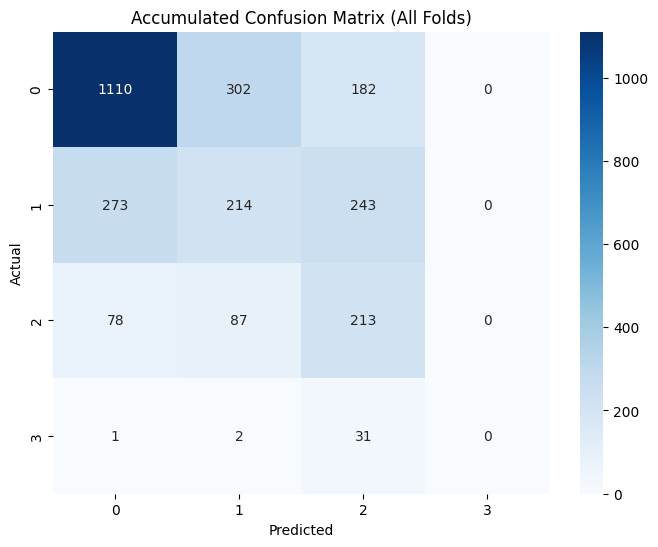

Time taken: 7581.5913 seconds


In [73]:
import time

# Start time
start_time = time.time()


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

thresholds = [0.54167994, 0.83456239, 2.90832825]

# Define your model (e.g., tabular_model) and the target column 'sii'
X = df
y = df['sii']  # Target variable

# Define the number of folds for Stratified K-Fold (e.g., 5 folds)
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store the results
all_predictions = []
all_true_labels = []

# Initialize a confusion matrix (to accumulate results across all folds)
total_confusion_matrix = np.zeros((4, 4), dtype=int)  # Assuming 'sii' has 4 possible values (0, 1, 2, 3)

# Manually implement Stratified K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train your model on the training data
    tabular_model.fit(train=X_train)
    
    # Predict on the test data
    predictions = tabular_model.predict(X_test)
    
    # Store the predictions and true labels for later evaluation
    predicted_labels = threshold_Rounder(predictions['sii_prediction'], thresholds)
    all_predictions.extend(predicted_labels)
    all_true_labels.extend(y_test)
    
    # Calculate the confusion matrix for this fold and accumulate
    fold_confusion_matrix = confusion_matrix(y_test, predicted_labels, labels=[0, 1, 2, 3])
    total_confusion_matrix += fold_confusion_matrix
    
    # Calculate and print Cohen Kappa score for this fold
    fold_cohen_kappa_score = cohen_kappa_score(y_test, predicted_labels, weights='quadratic')
    print(f"Fold {fold + 1} Quadratic Cohen Kappa: {fold_cohen_kappa_score:.4f}")

# After all folds, you can evaluate the model's performance on all data
overall_cohen_kappa = cohen_kappa_score(all_true_labels, all_predictions, weights='quadratic')
print(f"\nOverall Quadratic Cohen Kappa (from all folds): {overall_cohen_kappa:.4f}")

# Plot the confusion matrix (accumulated across all folds)
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Accumulated Confusion Matrix (All Folds)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# End time
end_time = time.time()

# Calculate the time taken
elapsed_time = end_time - start_time

# Display the elapsed time
print(f"Time taken: {elapsed_time:.4f} seconds")

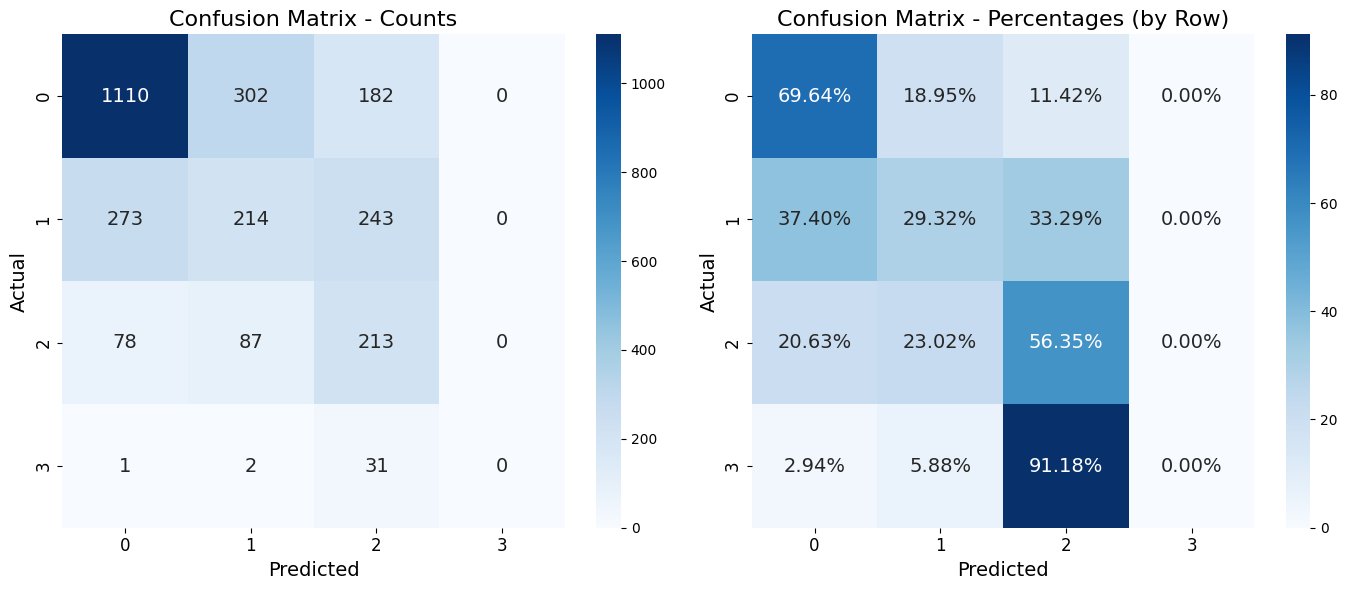

In [77]:
total_confusion_matrix = total_confusion_matrix

# Calculate the percentage confusion matrix by row
row_sums = np.sum(total_confusion_matrix, axis=1, keepdims=True)  # Sum of each row
percentage_confusion_matrix_by_row = total_confusion_matrix / row_sums * 100  # Normalize by row

# Manually format the percentages by adding '%' to each label
formatted_percentage_matrix = np.array([['{:.2f}%'.format(val) for val in row] for row in percentage_confusion_matrix_by_row])

# Create a figure with two subplots: one for the counts and one for percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix with counts
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[0], annot_kws={"size": 14})
axes[0].set_title("Confusion Matrix - Counts", fontsize=16)
axes[0].set_xlabel("Predicted", fontsize=14)
axes[0].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the confusion matrix with formatted percentages by row
sns.heatmap(percentage_confusion_matrix_by_row, annot=formatted_percentage_matrix, fmt="s", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[1], annot_kws={"size": 14})
axes[1].set_title("Confusion Matrix - Percentages (by Row)", fontsize=16)
axes[1].set_xlabel("Predicted", fontsize=14)
axes[1].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

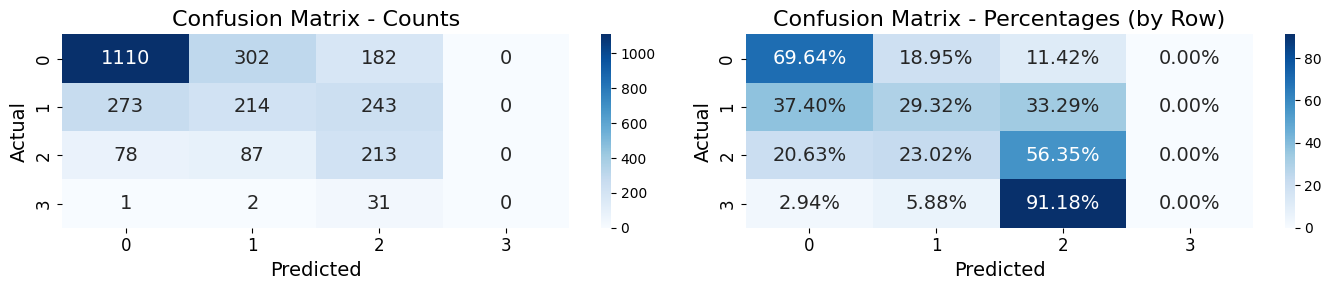

In [76]:
total_confusion_matrix = total_confusion_matrix

# Calculate the percentage confusion matrix by row
row_sums = np.sum(total_confusion_matrix, axis=1, keepdims=True)  # Sum of each row
percentage_confusion_matrix_by_row = total_confusion_matrix / row_sums * 100  # Normalize by row

# Manually format the percentages by adding '%' to each label
formatted_percentage_matrix = np.array([['{:.2f}%'.format(val) for val in row] for row in percentage_confusion_matrix_by_row])

# Create a figure with two subplots: one for the counts and one for percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

# Plot the confusion matrix with counts
sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[0], annot_kws={"size": 14})
axes[0].set_title("Confusion Matrix - Counts", fontsize=16)
axes[0].set_xlabel("Predicted", fontsize=14)
axes[0].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the confusion matrix with formatted percentages by row
sns.heatmap(percentage_confusion_matrix_by_row, annot=formatted_percentage_matrix, fmt="s", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], ax=axes[1], annot_kws={"size": 14})
axes[1].set_title("Confusion Matrix - Percentages (by Row)", fontsize=16)
axes[1].set_xlabel("Predicted", fontsize=14)
axes[1].set_ylabel("Actual", fontsize=14)

# Increase font size for ticks
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# 

# Mejorando GANDALF

import optuna
from pytorch_tabular.models import GANDALFConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular import TabularModel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.model_selection import cross_val_score
import numpy as np
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin

train, test = train_test_split(df, random_state=42, test_size=0.2)
train, val = train_test_split(train, random_state=42, test_size=0.2)
print(f"Train Shape: {train.shape} | Val Shape: {val.shape} | Test Shape: {test.shape}")

class CustomGandalfRegressor(BaseEstimator, RegressorMixin):
    '''
    Custom Gandalf Regressor
    
    It optimizes threshold values during fitting.
    Main goal is preventing overfit on validation data.
    '''
    def __init__(self, data_config, model_config, optimizer_config, trainer_config):
        """
        Initialize the wrapper for TabularModel, storing all necessary configurations.
        """
        print("Initializing TabularModel...")
        self.data_config = data_config
        self.model_config = model_config
        self.optimizer_config = optimizer_config
        self.trainer_config = trainer_config
        
        # Instantiate the TabularModel
        self.model = TabularModel(
            data_config=self.data_config,
            model_config=self.model_config,
            optimizer_config=self.optimizer_config,
            trainer_config=self.trainer_config,
            verbose=True
        )
    
    def fit(self, X, y):
        
        if self.model is None:
            print("Error: Model is None before fit")
        
        self.model.fit(X)
        y_pred = self.model.predict(X)

        # Check if y_pred contains NaN values
        if np.any(np.isnan(y_pred)):
            print(f"NaN values detected in predictions: {y_pred}")
        
        self.optimizer = minimize(
            eval_preds, 
            x0=[0.5, 1.5, 2.5], 
            args=(y, y_pred), 
            method='Nelder-Mead',
        )
        
    def predict(self, X):
        #print(f"Using model for prediction: {self.model}")  # Debugging print statement
        y_pred = self.model.predict(X)

        # Check if y_pred contains NaN values before returning
        if np.any(np.isnan(y_pred)):
            print(f"NaN values detected in predictions during prediction: {y_pred}")

        print(self.optimizer.x)
        
        y_pred = threshold_Rounder(y_pred, self.optimizer.x)

        # Check if y_pred contains NaN values before returning
        if np.any(np.isnan(y_pred)):
            print(f"NaN values detected in predictions during rounding: {y_pred}")

        
        return y_pred

def gandalf_objective(trial):
    """
    Objective function for GANDALF hyperparameter tuning using Optuna.
    """
    # Suggest hyperparameters for GANDALF
    params = {
        'task': 'regression',  # Since we are doing regression
        'gflu_stages': trial.suggest_int('gflu_stages', 4, 8),
        'gflu_feature_init_sparsity': trial.suggest_float('gflu_feature_init_sparsity', 0.1, 0.5),
        'gflu_dropout': trial.suggest_float('gflu_dropout', 0.0, 0.3),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True),
    }

    print(f"Trial params: {params}")  # Add logging to check the parameters

    # Cross-validation setup
    X = df#.drop(['sii'], axis=1)  # Assuming 'sii' is the target
    y = df['sii']

    # Convert X and y to NumPy arrays
    #X = X.values
    #y = y.values

    # Reshape y to be 2D for regression (n_samples, 1)
    #y = y.reshape(-1, 1)

    # Create StratifiedKFold cross-validation iterator
    cv = StratifiedKFold(5, shuffle=True, random_state=42)

    # Create model configuration with the suggested hyperparameters
    model_config = GANDALFConfig(
        task=params['task'],
        gflu_stages=params['gflu_stages'],
        gflu_feature_init_sparsity=params['gflu_feature_init_sparsity'],
        gflu_dropout=params['gflu_dropout'],
        learning_rate=params['learning_rate'],
    )

    data_config = DataConfig(
        target=['sii'],
        continuous_cols=numerical_columns,
        categorical_cols=categorical_columns,
    )

    optimizer_config = OptimizerConfig()
    trainer_config = TrainerConfig(
        batch_size=64,
        max_epochs=100,
    )

    # Instantiate the wrapper for TabularModel
    tabular_model = CustomGandalfRegressor(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )

    # Cross-validation: Use cross_val_score with the Kappa scorer
    val_scores = cross_val_score(
        estimator=tabular_model,
        X=X,
        y=y,
        cv=cv,
        scoring=KAPPA_SCORER,
    )

    print(np.mean(val_scores))
    
    # Return the mean score across all folds
    return np.mean(val_scores)

# Function to optimize the GANDALF model hyperparameters
def optimize_model(objective, study_name):
    """
    Run the optimization process using Optuna
    """
    study = optuna.create_study(direction='maximize', study_name=study_name)
    study.optimize(objective, n_trials=10, show_progress_bar=True)
    return study.best_trial.params

# Run the optimization for the GANDALF model
best_params_gandalf = optimize_model(gandalf_objective, 'GANDALF_Regressor')

print("Best parameters for GANDALF:", best_params_gandalf)

best_params_gandalf #= {'gflu_stages': 5, 'gflu_feature_init_sparsity': 0.12205823231929194, 'gflu_dropout': 0.16983769351252187, 'learning_rate': 0.00016181005577836825}
best_params_gandalf

model_config = GANDALFConfig(
        task='regression',
        gflu_stages=best_params_gandalf['gflu_stages'],
        gflu_feature_init_sparsity=best_params_gandalf['gflu_feature_init_sparsity'],
        gflu_dropout=best_params_gandalf['gflu_dropout'],
        learning_rate=best_params_gandalf['learning_rate'],
    )

data_config = DataConfig(
        target=['sii'],
        continuous_cols=numerical_columns,
        categorical_cols=categorical_columns,
    )

optimizer_config = OptimizerConfig()
trainer_config = TrainerConfig(
        batch_size=64,
        max_epochs=100,
    )

model_gandalf = CustomGandalfRegressor(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )

X = df#.drop(['sii'], axis=1)
y = df['sii']
cv = StratifiedKFold(5, shuffle=True, random_state=42)

val_scores_gandalf = cross_val_score(model_gandalf, X, y, cv=cv, scoring=KAPPA_SCORER,)
np.mean(val_scores_gandalf)

val_scores_gandalf

np.mean(val_scores_gandalf)

model_gandalf.fit(X,y)

y_pred_gandalf = model_gandalf.predict(X)

# Print the first few predictions for each model to check for variance
print("Gandalf predictions:", y_pred_gandalf[:10].flatten())

y_pred_gandalf.flatten()

X['sii'].values

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = y_pred_gandalf.flatten()
y_true = X['sii'].values

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()